In [1]:
import pandas as pd
import numpy as np

In [2]:
df_trks = pd.read_csv('https://api.vitaldb.net/trks')
df_cases = pd.read_csv("https://api.vitaldb.net/cases")
df_labs = pd.read_csv('https://api.vitaldb.net/labs')

* df_trks chech

In [3]:
df_trks.head()

,caseid,tname,tid
0,1,BIS/BIS,fd869e25ba82a66cc95b38ed47110bf4f14bb368
1,1,BIS/EEG1_WAV,0aa685df768489a18a5e9f53af0d83bf60890c73
2,1,BIS/EEG2_WAV,ad13b2c39b19193c8ae4a2de4f8315f18d61a57e
3,1,BIS/EMG,2525603efe18d982764dbca457affe7a45e766a9
4,1,BIS/SEF,1c91aec859304840dec75acf4a35da78be0e8ef0


* If df_trks['tname'] == 'SNUADC/PLETH'

In [4]:
df_trks['tname'].unique() 

array(['BIS/BIS', 'BIS/EEG1_WAV', 'BIS/EEG2_WAV', 'BIS/EMG', 'BIS/SEF',
       'BIS/SQI', 'BIS/SR', 'BIS/TOTPOW', 'Primus/AWP', 'Primus/CO2',
       'Primus/COMPLIANCE', 'Primus/ETCO2', 'Primus/EXP_DES',
       'Primus/EXP_SEVO', 'Primus/FEN2O', 'Primus/FEO2', 'Primus/FIN2O',
       'Primus/FIO2', 'Primus/INCO2', 'Primus/INSP_DES',
       'Primus/INSP_SEVO', 'Primus/MAC', 'Primus/MAWP_MBAR', 'Primus/MV',
       'Primus/PAMB_MBAR', 'Primus/PEEP_MBAR', 'Primus/PIP_MBAR',
       'Primus/PPLAT_MBAR', 'Primus/RR_CO2', 'Primus/SET_AGE',
       'Primus/SET_FIO2', 'Primus/SET_FRESH_FLOW',
       'Primus/SET_INSP_PAUSE', 'Primus/SET_INSP_TM',
       'Primus/SET_INTER_PEEP', 'Primus/SET_PIP', 'Primus/SET_RR_IPPV',
       'Primus/SET_TV_L', 'Primus/TV', 'Primus/VENT_LEAK', 'SNUADC/ART',
       'SNUADC/ECG_II', 'SNUADC/ECG_V5', 'SNUADC/PLETH',
       'Solar8000/ART_DBP', 'Solar8000/ART_MBP', 'Solar8000/ART_SBP',
       'Solar8000/BT', 'Solar8000/ETCO2', 'Solar8000/FEO2',
       'Solar8000/FIO2', '

In [5]:
df_trks_id = set(df_trks[df_trks['tname'] == 'SNUADC/PLETH']['caseid'])

In [6]:
len(df_trks_id)

6157

In [7]:
len(set(df_trks_id))

6157

* if tname == ?? case id 

In [8]:
df_cases

,caseid,subjectid,casestart,caseend,anestart,aneend,opstart,opend,adm,dis,...,intraop_colloid,intraop_ppf,intraop_mdz,intraop_ftn,intraop_rocu,intraop_vecu,intraop_eph,intraop_phe,intraop_epi,intraop_ca
0,1,5955,0,11542,-552,10848.0,1668,10368,-236220,627780,...,0,120,0.0,100,70,0,10,0,0,0
1,2,2487,0,15741,-1039,14921.0,1721,14621,-221160,1506840,...,0,150,0.0,0,100,0,20,0,0,0
2,3,2861,0,4394,-590,4210.0,1090,3010,-218640,40560,...,0,0,0.0,0,50,0,0,0,0,0
3,4,1903,0,20990,-778,20222.0,2522,17822,-201120,576480,...,0,80,0.0,100,100,0,50,0,0,0
4,5,4416,0,21531,-1009,22391.0,2591,20291,-67560,3734040,...,0,0,0.0,0,160,0,10,900,0,2100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6383,6384,5583,0,15248,-260,15640.0,2140,14140,-215340,648660,...,0,150,0.0,0,90,0,20,0,0,0
6384,6385,2278,0,20643,-544,20996.0,2396,19496,-225600,1675200,...,0,100,0.0,0,100,0,25,30,0,300
6385,6386,4045,0,19451,-667,19133.0,3533,18233,-200460,836340,...,0,70,0.0,0,130,0,10,0,0,0
6386,6387,5230,0,12025,-550,12830.0,1730,11030,-227760,377040,...,0,120,0.0,0,50,0,0,0,0,0


In [9]:
df_ica = df_cases[df_cases['caseid'].map(lambda x: x in df_trks_id)]

In [10]:
df_ica

,caseid,subjectid,casestart,caseend,anestart,aneend,opstart,opend,adm,dis,...,intraop_colloid,intraop_ppf,intraop_mdz,intraop_ftn,intraop_rocu,intraop_vecu,intraop_eph,intraop_phe,intraop_epi,intraop_ca
0,1,5955,0,11542,-552,10848.0,1668,10368,-236220,627780,...,0,120,0.0,100,70,0,10,0,0,0
1,2,2487,0,15741,-1039,14921.0,1721,14621,-221160,1506840,...,0,150,0.0,0,100,0,20,0,0,0
2,3,2861,0,4394,-590,4210.0,1090,3010,-218640,40560,...,0,0,0.0,0,50,0,0,0,0,0
3,4,1903,0,20990,-778,20222.0,2522,17822,-201120,576480,...,0,80,0.0,100,100,0,50,0,0,0
4,5,4416,0,21531,-1009,22391.0,2591,20291,-67560,3734040,...,0,0,0.0,0,160,0,10,900,0,2100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6383,6384,5583,0,15248,-260,15640.0,2140,14140,-215340,648660,...,0,150,0.0,0,90,0,20,0,0,0
6384,6385,2278,0,20643,-544,20996.0,2396,19496,-225600,1675200,...,0,100,0.0,0,100,0,25,30,0,300
6385,6386,4045,0,19451,-667,19133.0,3533,18233,-200460,836340,...,0,70,0.0,0,130,0,10,0,0,0
6386,6387,5230,0,12025,-550,12830.0,1730,11030,-227760,377040,...,0,120,0.0,0,50,0,0,0,0,0


In [11]:
lab_ica_id = list(set(df_labs[df_labs['name'] == 'ica']['caseid']))

In [12]:
df_labs_ica = df_ica[df_ica['caseid'].map(lambda x: x in lab_ica_id)]

In [13]:
df_labs_ica

,caseid,subjectid,casestart,caseend,anestart,aneend,opstart,opend,adm,dis,...,intraop_colloid,intraop_ppf,intraop_mdz,intraop_ftn,intraop_rocu,intraop_vecu,intraop_eph,intraop_phe,intraop_epi,intraop_ca
0,1,5955,0,11542,-552,10848.0,1668,10368,-236220,627780,...,0,120,0.0,100,70,0,10,0,0,0
3,4,1903,0,20990,-778,20222.0,2522,17822,-201120,576480,...,0,80,0.0,100,100,0,50,0,0,0
4,5,4416,0,21531,-1009,22391.0,2591,20291,-67560,3734040,...,0,0,0.0,0,160,0,10,900,0,2100
6,7,5124,0,15770,477,14817.0,3177,14577,-154320,623280,...,0,0,0.0,0,120,0,0,0,0,0
9,10,2175,0,20992,-1743,21057.0,2457,19857,-220740,3580860,...,0,90,0.0,0,110,0,20,500,0,600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6382,6383,4255,0,23242,-1883,23137.0,3037,22641,-224040,812760,...,35,0,0.0,0,80,0,10,0,0,300
6384,6385,2278,0,20643,-544,20996.0,2396,19496,-225600,1675200,...,0,100,0.0,0,100,0,25,30,0,300
6385,6386,4045,0,19451,-667,19133.0,3533,18233,-200460,836340,...,0,70,0.0,0,130,0,10,0,0,0
6386,6387,5230,0,12025,-550,12830.0,1730,11030,-227760,377040,...,0,120,0.0,0,50,0,0,0,0,0


In [14]:
def anocut(x):
  if 1.1 <= x <= 1.3:
    output = 'Norm'
  elif x > 1.3:
    output = 'UpNorm'
  else:
    output = 'DnNorm'
  return output

In [15]:
df_labs['label'] = df_labs[df_labs['name'] == 'ica']['result'].map(lambda x : anocut(x))

In [16]:
df_labs = df_labs.dropna()

In [17]:
df_labs

,caseid,dt,name,result,label
55,1,3060,ica,1.03,DnNorm
56,1,8921,ica,1.04,DnNorm
57,1,4628,ica,1.08,DnNorm
346,4,28903,ica,1.13,Norm
347,4,19934,ica,1.15,Norm
...,...,...,...,...,...
928275,6386,3549,ica,1.18,Norm
928276,6386,12554,ica,1.18,Norm
928359,6387,1905,ica,1.10,Norm
928422,6388,6649,ica,1.03,DnNorm


In [18]:
df_ica_label = df_labs.drop_duplicates(['caseid'],  keep='last', inplace=False, ignore_index=False)

In [19]:
id_lb = df_ica_label[['caseid', 'label']]

In [20]:
id_lb

,caseid,label
57,1,DnNorm
351,4,Norm
708,5,Norm
1075,7,Norm
1435,10,Norm
...,...,...
927826,6383,DnNorm
928156,6385,DnNorm
928276,6386,Norm
928359,6387,Norm


In [21]:
df_labs_ica

,caseid,subjectid,casestart,caseend,anestart,aneend,opstart,opend,adm,dis,...,intraop_colloid,intraop_ppf,intraop_mdz,intraop_ftn,intraop_rocu,intraop_vecu,intraop_eph,intraop_phe,intraop_epi,intraop_ca
0,1,5955,0,11542,-552,10848.0,1668,10368,-236220,627780,...,0,120,0.0,100,70,0,10,0,0,0
3,4,1903,0,20990,-778,20222.0,2522,17822,-201120,576480,...,0,80,0.0,100,100,0,50,0,0,0
4,5,4416,0,21531,-1009,22391.0,2591,20291,-67560,3734040,...,0,0,0.0,0,160,0,10,900,0,2100
6,7,5124,0,15770,477,14817.0,3177,14577,-154320,623280,...,0,0,0.0,0,120,0,0,0,0,0
9,10,2175,0,20992,-1743,21057.0,2457,19857,-220740,3580860,...,0,90,0.0,0,110,0,20,500,0,600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6382,6383,4255,0,23242,-1883,23137.0,3037,22641,-224040,812760,...,35,0,0.0,0,80,0,10,0,0,300
6384,6385,2278,0,20643,-544,20996.0,2396,19496,-225600,1675200,...,0,100,0.0,0,100,0,25,30,0,300
6385,6386,4045,0,19451,-667,19133.0,3533,18233,-200460,836340,...,0,70,0.0,0,130,0,10,0,0,0
6386,6387,5230,0,12025,-550,12830.0,1730,11030,-227760,377040,...,0,120,0.0,0,50,0,0,0,0,0


In [22]:
final_df = pd.merge(df_labs_ica, id_lb, on='caseid')

In [23]:
final_df 

,caseid,subjectid,casestart,caseend,anestart,aneend,opstart,opend,adm,dis,...,intraop_ppf,intraop_mdz,intraop_ftn,intraop_rocu,intraop_vecu,intraop_eph,intraop_phe,intraop_epi,intraop_ca,label
0,1,5955,0,11542,-552,10848.0,1668,10368,-236220,627780,...,120,0.0,100,70,0,10,0,0,0,DnNorm
1,4,1903,0,20990,-778,20222.0,2522,17822,-201120,576480,...,80,0.0,100,100,0,50,0,0,0,Norm
2,5,4416,0,21531,-1009,22391.0,2591,20291,-67560,3734040,...,0,0.0,0,160,0,10,900,0,2100,Norm
3,7,5124,0,15770,477,14817.0,3177,14577,-154320,623280,...,0,0.0,0,120,0,0,0,0,0,Norm
4,10,2175,0,20992,-1743,21057.0,2457,19857,-220740,3580860,...,90,0.0,0,110,0,20,500,0,600,Norm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3531,6383,4255,0,23242,-1883,23137.0,3037,22641,-224040,812760,...,0,0.0,0,80,0,10,0,0,300,DnNorm
3532,6385,2278,0,20643,-544,20996.0,2396,19496,-225600,1675200,...,100,0.0,0,100,0,25,30,0,300,DnNorm
3533,6386,4045,0,19451,-667,19133.0,3533,18233,-200460,836340,...,70,0.0,0,130,0,10,0,0,0,Norm
3534,6387,5230,0,12025,-550,12830.0,1730,11030,-227760,377040,...,120,0.0,0,50,0,0,0,0,0,Norm


In [24]:
final_df

,caseid,subjectid,casestart,caseend,anestart,aneend,opstart,opend,adm,dis,...,intraop_ppf,intraop_mdz,intraop_ftn,intraop_rocu,intraop_vecu,intraop_eph,intraop_phe,intraop_epi,intraop_ca,label
0,1,5955,0,11542,-552,10848.0,1668,10368,-236220,627780,...,120,0.0,100,70,0,10,0,0,0,DnNorm
1,4,1903,0,20990,-778,20222.0,2522,17822,-201120,576480,...,80,0.0,100,100,0,50,0,0,0,Norm
2,5,4416,0,21531,-1009,22391.0,2591,20291,-67560,3734040,...,0,0.0,0,160,0,10,900,0,2100,Norm
3,7,5124,0,15770,477,14817.0,3177,14577,-154320,623280,...,0,0.0,0,120,0,0,0,0,0,Norm
4,10,2175,0,20992,-1743,21057.0,2457,19857,-220740,3580860,...,90,0.0,0,110,0,20,500,0,600,Norm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3531,6383,4255,0,23242,-1883,23137.0,3037,22641,-224040,812760,...,0,0.0,0,80,0,10,0,0,300,DnNorm
3532,6385,2278,0,20643,-544,20996.0,2396,19496,-225600,1675200,...,100,0.0,0,100,0,25,30,0,300,DnNorm
3533,6386,4045,0,19451,-667,19133.0,3533,18233,-200460,836340,...,70,0.0,0,130,0,10,0,0,0,Norm
3534,6387,5230,0,12025,-550,12830.0,1730,11030,-227760,377040,...,120,0.0,0,50,0,0,0,0,0,Norm


In [25]:
final_df = final_df.dropna(axis=1)

In [27]:
final_df['label'].value_counts()

Norm      3025
DnNorm     342
UpNorm     169
Name: label, dtype: int64

In [31]:
df_dn = final_df[final_df['label'] == 'DnNorm'][:169]

In [32]:
df_norm = final_df[final_df['label'] == 'Norm'][:169]

In [33]:
df_up = final_df[final_df['label'] == 'UpNorm'][:169]

In [45]:
final_df = pd.concat([df_dn, df_norm, df_up], axis=0)

In [46]:
final_df

,caseid,subjectid,casestart,caseend,anestart,aneend,opstart,opend,adm,dis,...,intraop_ppf,intraop_mdz,intraop_ftn,intraop_rocu,intraop_vecu,intraop_eph,intraop_phe,intraop_epi,intraop_ca,label
0,1,5955,0,11542,-552,10848.0,1668,10368,-236220,627780,...,120,0.0,100,70,0,10,0,0,0,DnNorm
12,25,1669,0,14832,-1118,14782.0,1882,13882,-221280,901920,...,100,0.0,0,100,0,20,90,0,600,DnNorm
18,38,2216,0,12291,-651,12009.0,3489,11690,-221640,296760,...,0,0.0,0,110,0,10,0,0,0,DnNorm
27,52,1724,0,15590,-1453,15647.0,3647,14747,-220140,1075860,...,0,0.0,0,120,0,0,0,0,0,DnNorm
37,69,3443,0,7364,-672,6768.0,1668,5868,-124620,307380,...,0,0.0,0,80,0,0,0,0,0,DnNorm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3507,6337,5565,0,24223,-449,25651.0,4051,23551,-1286520,1391880,...,0,0.0,0,3,0,0,0,0,0,UpNorm
3513,6351,3577,0,30861,-952,30848.0,3548,29648,-373800,1008600,...,0,0.0,0,120,0,30,400,0,1800,UpNorm
3517,6359,3107,0,7884,-553,7367.0,1367,6467,-122220,50580,...,0,0.0,0,50,0,0,0,0,0,UpNorm
3529,6378,3181,0,25049,-368,25432.0,4612,24232,-399360,551040,...,100,0.0,0,110,0,30,0,0,600,UpNorm


In [47]:
f_train_x = final_df.drop(['caseid','label'], axis=1)

In [48]:
df_tp = f_train_x.dtypes.reset_index()

In [49]:
df_tp

,index,0
0,subjectid,int64
1,casestart,int64
2,caseend,int64
3,anestart,int64
4,aneend,float64
5,opstart,int64
6,opend,int64
7,adm,int64
8,dis,int64
9,icu_days,int64


In [50]:
ob_lt = list(df_tp[(df_tp[0] == 'object')]['index'])

In [51]:
ob_lt

['sex',
 'department',
 'optype',
 'dx',
 'opname',
 'approach',
 'ane_type',
 'preop_ecg',
 'preop_pft']

In [52]:
uniq = dict()
for i in ob_lt:
    uniq[i] = len(f_train_x[i].unique())

In [53]:
uniq

{'sex': 2,
 'department': 4,
 'optype': 11,
 'dx': 217,
 'opname': 105,
 'approach': 3,
 'ane_type': 3,
 'preop_ecg': 9,
 'preop_pft': 9}

In [54]:
f_train_x['dx']

0                                     Rectal cancer
12                          Advanced gastric cancer
18                                 Lung cancer left
27                          End stage renal disease
37                 Malignant neoplasm of chest wall
                           ...                     
3507                   Hepatic failure without coma
3513    Atherosclerosis obliterans without gangrene
3517                           Hyperparathyroidism 
3529                       Hepatocellular carcinoma
3530                            Parathyroid disease
Name: dx, Length: 507, dtype: object

In [55]:
f_train_x['preop_ecg']

0       Normal Sinus Rhythm
12      Normal Sinus Rhythm
18      Normal Sinus Rhythm
27      Normal Sinus Rhythm
37      Normal Sinus Rhythm
               ...         
3507    Normal Sinus Rhythm
3513    Normal Sinus Rhythm
3517    Normal Sinus Rhythm
3529    Normal Sinus Rhythm
3530    Normal Sinus Rhythm
Name: preop_ecg, Length: 507, dtype: object

In [56]:
f_train_x['opname']

0       Low anterior resection
12           Total gastrectomy
18              Lung lobectomy
27      Kidney transplantation
37                    Excision
                 ...          
3507     Liver transplantation
3513         Aortoiliac bypass
3517         Parathyroidectomy
3529           Hemihepatectomy
3530         Thyroid lobectomy
Name: opname, Length: 507, dtype: object

In [57]:
f_train_x['optype']

0            Colorectal
12              Stomach
18      Major resection
27      Transplantation
37               Others
             ...       
3507    Transplantation
3513           Vascular
3517            Thyroid
3529            Hepatic
3530            Thyroid
Name: optype, Length: 507, dtype: object

In [58]:
f_train_x = f_train_x.drop(['dx', 'preop_ecg','opname'], axis=1)

In [59]:
ob_lt

['sex',
 'department',
 'optype',
 'dx',
 'opname',
 'approach',
 'ane_type',
 'preop_ecg',
 'preop_pft']

In [60]:
ob_lt.remove('dx')

In [61]:
ob_lt.remove('preop_ecg')

In [62]:
ob_lt.remove('opname')

In [63]:
df_oh = pd.get_dummies(f_train_x[ob_lt])

In [64]:
df_no_oh = f_train_x.drop(ob_lt, axis=1)

In [65]:
df = pd.concat([df_oh, df_no_oh], axis=1)

In [66]:
df

,sex_F,sex_M,department_General surgery,department_Gynecology,department_Thoracic surgery,department_Urology,optype_Biliary/Pancreas,optype_Breast,optype_Colorectal,optype_Hepatic,...,intraop_colloid,intraop_ppf,intraop_mdz,intraop_ftn,intraop_rocu,intraop_vecu,intraop_eph,intraop_phe,intraop_epi,intraop_ca
0,0,1,1,0,0,0,0,0,1,0,...,0,120,0.0,100,70,0,10,0,0,0
12,0,1,1,0,0,0,0,0,0,0,...,0,100,0.0,0,100,0,20,90,0,600
18,0,1,0,0,1,0,0,0,0,0,...,0,0,0.0,0,110,0,10,0,0,0
27,0,1,1,0,0,0,0,0,0,0,...,35,0,0.0,0,120,0,0,0,0,0
37,0,1,0,0,1,0,0,0,0,0,...,0,0,0.0,0,80,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3507,1,0,1,0,0,0,0,0,0,0,...,20,0,0.0,0,3,0,0,0,0,0
3513,0,1,1,0,0,0,0,0,0,0,...,500,0,0.0,0,120,0,30,400,0,1800
3517,1,0,1,0,0,0,0,0,0,0,...,0,0,0.0,0,50,0,0,0,0,0
3529,1,0,1,0,0,0,0,0,0,1,...,500,100,0.0,0,110,0,30,0,0,600


In [67]:
df

,sex_F,sex_M,department_General surgery,department_Gynecology,department_Thoracic surgery,department_Urology,optype_Biliary/Pancreas,optype_Breast,optype_Colorectal,optype_Hepatic,...,intraop_colloid,intraop_ppf,intraop_mdz,intraop_ftn,intraop_rocu,intraop_vecu,intraop_eph,intraop_phe,intraop_epi,intraop_ca
0,0,1,1,0,0,0,0,0,1,0,...,0,120,0.0,100,70,0,10,0,0,0
12,0,1,1,0,0,0,0,0,0,0,...,0,100,0.0,0,100,0,20,90,0,600
18,0,1,0,0,1,0,0,0,0,0,...,0,0,0.0,0,110,0,10,0,0,0
27,0,1,1,0,0,0,0,0,0,0,...,35,0,0.0,0,120,0,0,0,0,0
37,0,1,0,0,1,0,0,0,0,0,...,0,0,0.0,0,80,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3507,1,0,1,0,0,0,0,0,0,0,...,20,0,0.0,0,3,0,0,0,0,0
3513,0,1,1,0,0,0,0,0,0,0,...,500,0,0.0,0,120,0,30,400,0,1800
3517,1,0,1,0,0,0,0,0,0,0,...,0,0,0.0,0,50,0,0,0,0,0
3529,1,0,1,0,0,0,0,0,0,1,...,500,100,0.0,0,110,0,30,0,0,600


In [68]:
df_train = df

In [69]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [70]:
f_sc = scaler.fit(df_train)
f_ct = f_sc.transform(df_train)

In [71]:
f_ct = pd.DataFrame(f_ct) ; f_ct.head()

,0,1,2,3,4,5,6,7,8,9,...,52,53,54,55,56,57,58,59,60,61
0,-0.940616,0.940616,0.599374,-0.255198,-0.464572,-0.162221,-0.315885,-0.134433,2.630946,-0.259554,...,-0.298573,1.480501,-0.072528,2.467193,-0.264026,0.0,0.040392,-0.274652,-0.045143,-0.308316
1,-0.940616,0.940616,0.599374,-0.255198,-0.464572,-0.162221,-0.315885,-0.134433,-0.380091,-0.259554,...,-0.298573,1.106130,-0.072528,-0.409686,0.525716,0.0,0.601453,0.052350,-0.045143,0.279228
2,-0.940616,0.940616,-1.668407,-0.255198,2.152518,-0.162221,-0.315885,-0.134433,-0.380091,-0.259554,...,-0.298573,-0.765726,-0.072528,-0.409686,0.788963,0.0,0.040392,-0.274652,-0.045143,-0.308316
3,-0.940616,0.940616,0.599374,-0.255198,-0.464572,-0.162221,-0.315885,-0.134433,-0.380091,-0.259554,...,-0.109082,-0.765726,-0.072528,-0.409686,1.052211,0.0,-0.520669,-0.274652,-0.045143,-0.308316
4,-0.940616,0.940616,-1.668407,-0.255198,2.152518,-0.162221,-0.315885,-0.134433,-0.380091,-0.259554,...,-0.298573,-0.765726,-0.072528,-0.409686,-0.000779,0.0,-0.520669,-0.274652,-0.045143,-0.308316


In [72]:
f_ct.columns = df_train.columns

In [73]:
f_train_x = f_ct

In [74]:
train_y = final_df['label']

In [75]:
train_x = f_train_x

In [76]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings(action='ignore')

In [77]:
X_train, X_test, y_train, y_test = train_test_split(train_x, train_y,
                                                   test_size=0.2, random_state=42, stratify=train_y)

In [78]:
dt_clf = DecisionTreeClassifier(random_state=42)

In [79]:
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [80]:
dt_preds = dt_clf.predict(X_test)

In [81]:
accuracy_score(y_test, dt_preds)

0.5196078431372549

In [82]:
dt_preds

array(['DnNorm', 'DnNorm', 'Norm', 'DnNorm', 'DnNorm', 'UpNorm', 'UpNorm',
       'Norm', 'Norm', 'UpNorm', 'UpNorm', 'Norm', 'DnNorm', 'UpNorm',
       'Norm', 'DnNorm', 'Norm', 'DnNorm', 'UpNorm', 'DnNorm', 'UpNorm',
       'DnNorm', 'UpNorm', 'DnNorm', 'DnNorm', 'UpNorm', 'Norm', 'DnNorm',
       'UpNorm', 'DnNorm', 'UpNorm', 'DnNorm', 'UpNorm', 'UpNorm',
       'DnNorm', 'Norm', 'Norm', 'Norm', 'Norm', 'Norm', 'UpNorm', 'Norm',
       'DnNorm', 'DnNorm', 'DnNorm', 'UpNorm', 'UpNorm', 'UpNorm',
       'UpNorm', 'DnNorm', 'Norm', 'Norm', 'DnNorm', 'Norm', 'Norm',
       'DnNorm', 'UpNorm', 'DnNorm', 'UpNorm', 'UpNorm', 'UpNorm',
       'UpNorm', 'UpNorm', 'UpNorm', 'DnNorm', 'Norm', 'Norm', 'DnNorm',
       'DnNorm', 'UpNorm', 'UpNorm', 'UpNorm', 'UpNorm', 'UpNorm',
       'UpNorm', 'Norm', 'UpNorm', 'Norm', 'Norm', 'DnNorm', 'UpNorm',
       'UpNorm', 'Norm', 'DnNorm', 'Norm', 'DnNorm', 'DnNorm', 'Norm',
       'DnNorm', 'DnNorm', 'DnNorm', 'DnNorm', 'DnNorm', 'DnNorm',
       'UpNo

In [83]:
y_test

120       Norm
68        Norm
1764    DnNorm
175     DnNorm
1672    DnNorm
         ...  
3         Norm
1031    DnNorm
3360    UpNorm
101       Norm
31        Norm
Name: label, Length: 102, dtype: object

In [84]:
f1_score(y_test, dt_preds, average='micro')

0.5196078431372549

In [85]:
params = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [1, 3, 5],
    'min_samples_leaf': [1, 5, 10],
    'min_samples_split': [5, 10, 15],
    'max_leaf_nodes': [2, 3, 4],
    'min_impurity_decrease': np.arange(0, 0.1, 0.01),
}

cv = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='f1', cv=cv)
grid_cv.fit(X_train, y_train)

print(grid_cv.best_params_)
print(grid_cv.best_score_)

{'criterion': 'gini', 'max_depth': 1, 'max_leaf_nodes': 2, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'best'}
nan


In [86]:
dt_preds = grid_cv.predict(X_test)

In [87]:
accuracy_score(y_test, dt_preds)

0.45098039215686275

In [95]:
import lightgbm as lgb

In [96]:
lgb_clf = lgb.LGBMClassifier(num_leaves=31, objective='binary')
lgb_clf.fit(X_train, y_train)

LGBMClassifier(objective='binary')

In [97]:
y_pred = lgb_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.5490196078431373

In [98]:
y_test

120       Norm
68        Norm
1764    DnNorm
175     DnNorm
1672    DnNorm
         ...  
3         Norm
1031    DnNorm
3360    UpNorm
101       Norm
31        Norm
Name: label, Length: 102, dtype: object

In [99]:
y_pred

array(['UpNorm', 'Norm', 'Norm', 'Norm', 'DnNorm', 'UpNorm', 'UpNorm',
       'DnNorm', 'Norm', 'UpNorm', 'DnNorm', 'UpNorm', 'UpNorm', 'UpNorm',
       'UpNorm', 'Norm', 'Norm', 'DnNorm', 'UpNorm', 'Norm', 'UpNorm',
       'Norm', 'Norm', 'UpNorm', 'Norm', 'UpNorm', 'Norm', 'DnNorm',
       'UpNorm', 'DnNorm', 'DnNorm', 'DnNorm', 'UpNorm', 'UpNorm',
       'DnNorm', 'Norm', 'Norm', 'Norm', 'Norm', 'UpNorm', 'UpNorm',
       'Norm', 'DnNorm', 'DnNorm', 'Norm', 'Norm', 'UpNorm', 'UpNorm',
       'UpNorm', 'DnNorm', 'DnNorm', 'Norm', 'DnNorm', 'Norm', 'Norm',
       'DnNorm', 'Norm', 'DnNorm', 'DnNorm', 'UpNorm', 'Norm', 'Norm',
       'UpNorm', 'UpNorm', 'DnNorm', 'UpNorm', 'UpNorm', 'DnNorm',
       'DnNorm', 'UpNorm', 'DnNorm', 'UpNorm', 'UpNorm', 'UpNorm',
       'UpNorm', 'Norm', 'UpNorm', 'DnNorm', 'UpNorm', 'DnNorm', 'DnNorm',
       'UpNorm', 'DnNorm', 'DnNorm', 'Norm', 'DnNorm', 'DnNorm', 'Norm',
       'DnNorm', 'UpNorm', 'DnNorm', 'DnNorm', 'DnNorm', 'DnNorm',
       'UpNorm',

In [101]:
from lightgbm import plot_importance

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

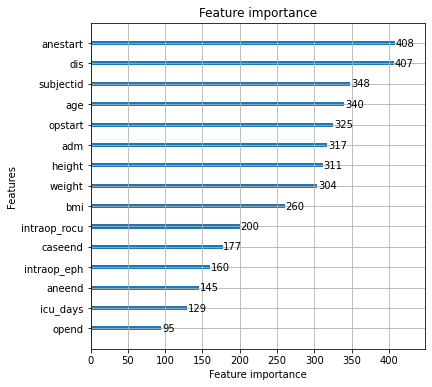

In [103]:
f, ax = plt.subplots(figsize=(6,6))
plot_importance(lgb_clf, max_num_features=15, ax=ax)

In [105]:
df_cases['anestart']

0       -552
1      -1039
2       -590
3       -778
4      -1009
        ... 
6383    -260
6384    -544
6385    -667
6386    -550
6387     -79
Name: anestart, Length: 6388, dtype: int64

In [106]:
df_cases['dis']

0        627780
1       1506840
2         40560
3        576480
4       3734040
         ...   
6383     648660
6384    1675200
6385     836340
6386     377040
6387     379140
Name: dis, Length: 6388, dtype: int64